 First 5 Rows:
    Size  Location  Number_of_Rooms   Price
0   850     Urban                3  180000
1  1200  Suburban                4  200000
2   950     Rural                3  135000
3  1500     Urban                5  300000
4  1100  Suburban                3  190000

 Missing Values:
 Size               0
Location           0
Number_of_Rooms    0
Price              0
dtype: int64

Summary Statistics:
               Size  Number_of_Rooms          Price
count    20.000000        20.000000      20.000000
mean   1380.000000         4.000000  251250.000000
std     450.263081         1.123903  102660.336727
min     600.000000         2.000000   95000.000000
25%    1037.500000         3.000000  175000.000000
50%    1350.000000         4.000000  230000.000000
75%    1637.500000         5.000000  322500.000000
max    2400.000000         6.000000  460000.000000


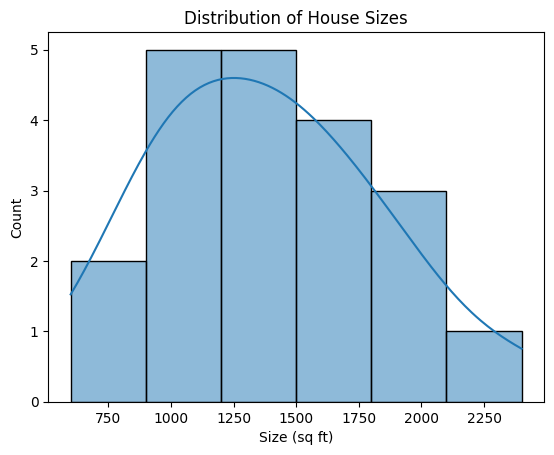

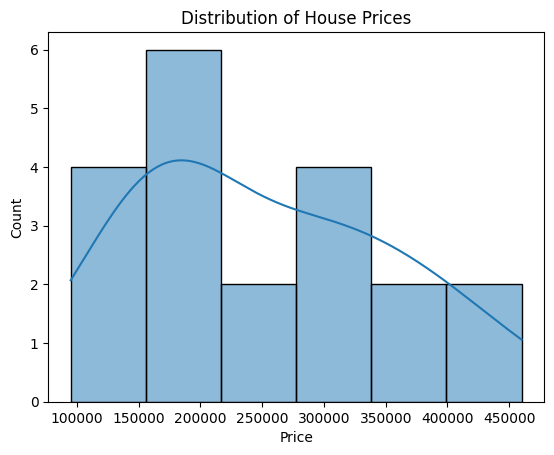

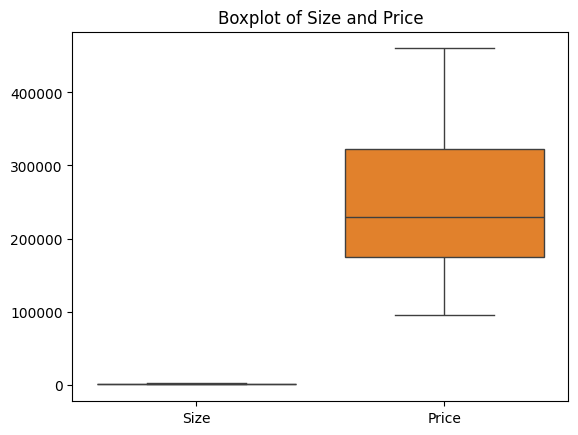


 Model Evaluation Metrics:
 Root Mean Squared Error (RMSE): 15997.68
 R² Score: 0.8130

 Feature Coefficients (Importance):
Size_scaled: 75485.29
Rooms_scaled: 10162.29
Location_Suburban: 35098.37
Location_Urban: 64552.13


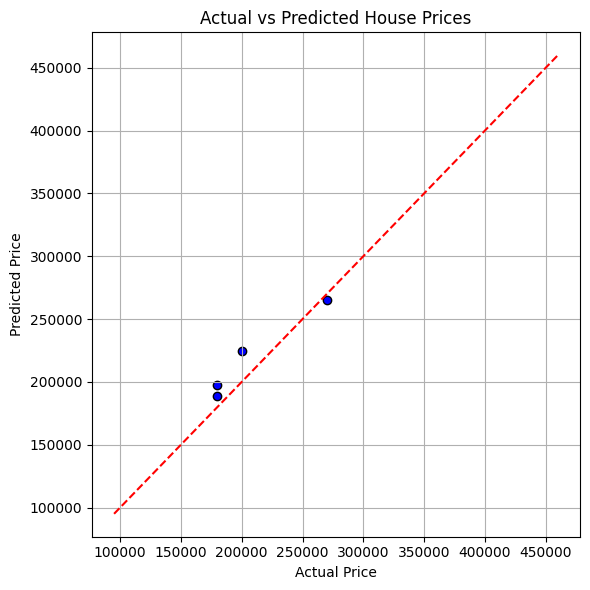

In [7]:
#Task 4: House Price Regression

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Dataset
df = pd.read_csv('house_prices.csv')

# 🔍 Step 2: Inspect Dataset
print(" First 5 Rows:\n", df.head())
print("\n Missing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Plot Distributions
sns.histplot(df['Size'], kde=True)
plt.title("Distribution of House Sizes")
plt.xlabel("Size (sq ft)")
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.show()

# Outlier Detection
sns.boxplot(data=df[['Size', 'Price']])
plt.title("Boxplot of Size and Price")
plt.show()

# Step 3:  Preprocessing data

# Define Features and Target
X = df[['Size', 'Location', 'Number_of_Rooms']]
y = df['Price']

# ColumnTransformer: Scale numeric and encode categoricals
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Size', 'Number_of_Rooms']),
    ('cat', OneHotEncoder(drop='first'), ['Location'])  
])

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 5: Build and Train Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

#  Step 7: Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation Metrics:")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R² Score: {r2:.4f}")

# Step 8: Feature Insights
# Get feature names after encoding
feature_names = (
    ['Size_scaled', 'Rooms_scaled'] +
    model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['Location']).tolist()
)

coefficients = model.named_steps['regressor'].coef_

print("\n Feature Coefficients (Importance):")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.2f}")

# Step 9: Plot Actual vs Predicted Prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
